<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Bootcamp%20Data%20Science/Projeto%20M%C3%B3dulo%201/Projeto_Modulo1_Elton_Gil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 1 do **Bootcamp de Data Science Aplicada**

## Análise de dados reais utilizando **Python** e a biblioteca **Pandas**

### Neste projeto do Módulo 1 do Bootcamp de Data Science Aplicada, ministrado pela **Alura**, utilizará os dados do **DATASUS** (Departamento de Informática do Sistema Único de Saúde).

### A análise proposta por esse projeto é verificar se existe relação entre a taxa de mortalidade e o gastos anuais com saúde pública.

## **Referências:**

### - [DATASUS TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) - Foram extraídas informações do valor total por processamento das unidades da federação e a taxa de mortalidade. Os dados são anuais. A taxa de mortalidade é referente ao número de morte a cada 1000 habitantes.

### - [IBGE](https://discord.com/channels/840351975086227516/840388924522496051/844637132534448138) - Foram extraídos informações sobre a população dos estados e regiões do Brasil. Os dados são anuais.


# **ANÁLISE - Gastos com saúde pública, taxa de mortalidade e população brasileira**

### Bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Análise dos dados

In [2]:
# importando os datasets
dados_gastos = pd.read_csv('/content/gastos_anual.csv', skiprows = 3, skipfooter = 12, sep = ';',
                           thousands='.', decimal = ',', encoding='ISO-8859-1')
dados_pop = pd.read_excel('/content/pop_serie_2001_2020_TCU.xls', skiprows = 4, skipfooter = 10, thousands='.')

dados_mortal = pd.read_csv('/content/taxa_mortalidade.csv', skiprows=3, skipfooter=12, thousands='.', sep=';',
                           encoding='ISO-8859-1', decimal = ',')

# Tornando mais simples a visualização dos valores
pd.options.display.float_format = '{:.2f}'.format

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


### Demonstração das bases de dados utilizadas

In [3]:
# dados anuais dos gastos com saúde pública das unidades da federação
dados_gastos.head()

,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,11 Rondônia,28678308.60,43168433.96,51784823.62,54267636.35,51181258.99,66472516.81,79095836.74,86163443.56,91955338.88,95261076.71,102091843.39,109113101.49,109157714.48,28019921.10,996411254.68
1,12 Acre,22365143.69,27339128.19,28773343.06,33510058.61,32929373.49,33605893.87,36039320.36,37262018.93,40487149.58,37245525.42,34432565.81,34709598.96,40018213.54,11331196.96,450048530.47
2,13 Amazonas,95655211.98,105997335.28,114040833.27,121643071.13,124449598.86,129056584.80,121900696.54,151278739.06,147812237.69,160820207.41,175744827.43,189256198.89,210212793.77,69379599.94,1917247936.05
3,14 Roraima,10983016.60,17116094.26,20249589.01,17108611.37,21279908.04,21540894.01,19757952.27,24556486.66,29133807.87,31338348.90,33851454.13,34320141.86,36868427.83,10772232.28,328876965.09
4,15 Pará,269639839.22,317444388.93,320749087.16,321149377.64,315536309.93,340687749.39,342851637.96,353977050.33,357148898.98,388952636.23,410173716.47,410805540.79,446873379.68,109319389.58,4705309002.29


In [4]:
# dados anuais com as taxas de mortalidade das unidades da federação
dados_mortal.head()

,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,11 Rondônia,1.35,1.44,2.00,2.22,2.45,2.51,2.61,2.77,3.22,3.11,2.88,2.87,3.85,6.33,2.67
1,12 Acre,2.17,2.35,2.71,2.95,2.45,2.49,2.34,3.07,3.09,3.09,3.30,3.46,4.43,4.72,2.92
2,13 Amazonas,1.80,2.02,1.97,2.38,2.42,2.25,2.06,2.42,3.05,3.03,3.13,3.30,5.22,9.95,2.89
3,14 Roraima,1.55,1.87,2.42,2.10,2.37,1.84,1.94,2.27,2.68,2.66,2.97,3.20,4.21,8.20,2.68
4,15 Pará,1.48,1.62,1.71,1.79,1.92,2.02,2.10,2.28,2.41,2.43,2.38,2.39,3.45,3.73,2.15


In [5]:
# dados populacionais anuais das unidades da federação
dados_pop.head()

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Brasil,172385826.00,174632960.00,176871437.00,181581024.00,184184264.00,186770562.00,183989711.00,189612814.00,191480630.00,190747855.00,192379287.00,193946886.00,201032714.00,202768562.00,204450649.00,206081432.00,207660929.00,208494900.00,210147125.00,211755692.00
2,Região Norte,13245084.00,13504599.00,13784881.00,14373260.00,14698878.00,15022060.00,14623317.00,15142684.00,15359608.00,15880839.00,16095187.00,16318163.00,16983484.00,17231027.00,17472636.00,17707783.00,17936201.00,18182253.00,18430980.00,18672591.00
3,Rondônia,1407886.00,1431777.00,1455907.00,1562085.00,1534594.00,1562417.00,1453756.00,1493566.00,1503928.00,1560501.00,1576455.00,1590011.00,1728214.00,1748531.00,1768204.00,1787279.00,1805788.00,1757589.00,1777225.00,1796460.00
4,Acre,574355.00,586942.00,600595.00,630328.00,669736.00,686652.00,655385.00,680073.00,691132.00,732793.00,746386.00,758786.00,776463.00,790101.00,803513.00,816687.00,829619.00,869265.00,881935.00,894470.00


### Tratamento das bases de dados

In [6]:
# para o dataset com informações da população
# removendo a linha com dados não numéricos (NaN) e resetando o indíce
dados_pop.drop(index=0, inplace=True)
dados_pop.reset_index(inplace=True, drop=True)

# renomeando a coluna Unidades da Federação
dados_pop.rename(columns={'Unidades da Federação' : 'Unidade da Federação'}, inplace=True)
dados_pop.head()

,Unidade da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brasil,172385826.00,174632960.00,176871437.00,181581024.00,184184264.00,186770562.00,183989711.00,189612814.00,191480630.00,190747855.00,192379287.00,193946886.00,201032714.00,202768562.00,204450649.00,206081432.00,207660929.00,208494900.00,210147125.00,211755692.00
1,Região Norte,13245084.00,13504599.00,13784881.00,14373260.00,14698878.00,15022060.00,14623317.00,15142684.00,15359608.00,15880839.00,16095187.00,16318163.00,16983484.00,17231027.00,17472636.00,17707783.00,17936201.00,18182253.00,18430980.00,18672591.00
2,Rondônia,1407886.00,1431777.00,1455907.00,1562085.00,1534594.00,1562417.00,1453756.00,1493566.00,1503928.00,1560501.00,1576455.00,1590011.00,1728214.00,1748531.00,1768204.00,1787279.00,1805788.00,1757589.00,1777225.00,1796460.00
3,Acre,574355.00,586942.00,600595.00,630328.00,669736.00,686652.00,655385.00,680073.00,691132.00,732793.00,746386.00,758786.00,776463.00,790101.00,803513.00,816687.00,829619.00,869265.00,881935.00,894470.00
4,Amazonas,2900240.00,2961801.00,3031068.00,3138726.00,3232330.00,3311026.00,3221940.00,3341096.00,3393369.00,3480937.00,3538387.00,3590985.00,3807921.00,3873743.00,3938336.00,4001667.00,4063614.00,4080611.00,4144597.00,4207714.00


In [7]:
# separando as informações das regiões brasileiras
dados_pop_regiao = dados_pop.loc[[0,1,9,19,24,28]]
dados_pop_regiao.reset_index(inplace=True, drop=True)
dados_pop_regiao

,Unidade da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brasil,172385826.00,174632960.00,176871437.00,181581024.00,184184264.00,186770562.00,183989711.00,189612814.00,191480630.00,190747855.00,192379287.00,193946886.00,201032714.00,202768562.00,204450649.00,206081432.00,207660929.00,208494900.00,210147125.00,211755692.00
1,Região Norte,13245084.00,13504599.00,13784881.00,14373260.00,14698878.00,15022060.00,14623317.00,15142684.00,15359608.00,15880839.00,16095187.00,16318163.00,16983484.00,17231027.00,17472636.00,17707783.00,17936201.00,18182253.00,18430980.00,18672591.00
2,Região Nordeste,48331186.00,48845112.00,49352225.00,50427274.00,51019091.00,51609027.00,51535782.00,53088499.00,53591197.00,53078137.00,53501859.00,53907144.00,55794707.00,56186190.00,56560081.00,56915936.00,57254159.00,56760780.00,57071654.00,57374243.00
3,Região Sudeste,73470763.00,74447456.00,75391969.00,77374720.00,78472017.00,79561095.00,77873342.00,80187717.00,80915332.00,80353724.00,80975616.00,81565983.00,84465570.00,85115623.00,85745520.00,86356952.00,86949714.00,87711946.00,88371433.00,89012240.00
4,Região Sul,25453264.00,25734253.00,26025091.00,26635629.00,26973511.00,27308863.00,26733877.00,27497970.00,27719118.00,27384815.00,27562433.00,27731644.00,28795762.00,29016114.00,29230180.00,29439773.00,29644948.00,29754036.00,29975984.00,30192315.00
5,Região Centro-Oeste,11885529.00,12101540.00,12317271.00,12770141.00,13020767.00,13269517.00,13223393.00,13695944.00,13895375.00,14050340.00,14244192.00,14423952.00,14993191.00,15219608.00,15442232.00,15660988.00,15875907.00,16085885.00,16297074.00,16504303.00


In [8]:
# removendo as linhas com informações dos estados do dataset com os estados
dados_pop = dados_pop.drop({0,1,9,19,24,28})
dados_pop.reset_index(inplace=True, drop=True)
dados_pop.head()
                          

,Unidade da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Rondônia,1407886.00,1431777.00,1455907.00,1562085.00,1534594.00,1562417.00,1453756.00,1493566.00,1503928.00,1560501.00,1576455.00,1590011.00,1728214.00,1748531.00,1768204.00,1787279.00,1805788.00,1757589.00,1777225.00,1796460.00
1,Acre,574355.00,586942.00,600595.00,630328.00,669736.00,686652.00,655385.00,680073.00,691132.00,732793.00,746386.00,758786.00,776463.00,790101.00,803513.00,816687.00,829619.00,869265.00,881935.00,894470.00
2,Amazonas,2900240.00,2961801.00,3031068.00,3138726.00,3232330.00,3311026.00,3221940.00,3341096.00,3393369.00,3480937.00,3538387.00,3590985.00,3807921.00,3873743.00,3938336.00,4001667.00,4063614.00,4080611.00,4144597.00,4207714.00
3,Roraima,337237.00,346871.00,357302.00,381896.00,391317.00,403344.00,395725.00,412783.00,421499.00,451227.00,460165.00,469524.00,488072.00,496936.00,505665.00,514229.00,522636.00,576568.00,605761.00,631181.00
4,Pará,6341736.00,6453683.00,6574993.00,6850181.00,6970586.00,7110465.00,7065573.00,7321493.00,7431020.00,7603239.00,7688593.00,7792561.00,7969654.00,8073924.00,8175113.00,8272724.00,8366628.00,8513497.00,8602865.00,8690745.00


In [9]:
# Redefinindo os índices para os datasets da taxa de mortalidade e gastos com saúde pública
dados_mortal = dados_mortal.set_index('Unidade da Federação')
dados_gastos = dados_gastos.set_index('Unidade da Federação')
dados_pop = dados_pop.set_index('Unidade da Federação')
dados_gastos.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Unidade da Federação,,,,,,,,,,,,,,,
11 Rondônia,28678308.60,43168433.96,51784823.62,54267636.35,51181258.99,66472516.81,79095836.74,86163443.56,91955338.88,95261076.71,102091843.39,109113101.49,109157714.48,28019921.10,996411254.68
12 Acre,22365143.69,27339128.19,28773343.06,33510058.61,32929373.49,33605893.87,36039320.36,37262018.93,40487149.58,37245525.42,34432565.81,34709598.96,40018213.54,11331196.96,450048530.47
13 Amazonas,95655211.98,105997335.28,114040833.27,121643071.13,124449598.86,129056584.80,121900696.54,151278739.06,147812237.69,160820207.41,175744827.43,189256198.89,210212793.77,69379599.94,1917247936.05
14 Roraima,10983016.60,17116094.26,20249589.01,17108611.37,21279908.04,21540894.01,19757952.27,24556486.66,29133807.87,31338348.90,33851454.13,34320141.86,36868427.83,10772232.28,328876965.09
15 Pará,269639839.22,317444388.93,320749087.16,321149377.64,315536309.93,340687749.39,342851637.96,353977050.33,357148898.98,388952636.23,410173716.47,410805540.79,446873379.68,109319389.58,4705309002.29


In [10]:
# Renomeando as unidades da federação para o datasets de taxa de mortalidade
for row in dados_mortal.iterrows():
  uf=row[0]
  cod_regiao = int(uf.split(' ')[0])
  new_uf = uf.split(' ', maxsplit =1)[1]
  dados_mortal = dados_mortal.rename(index={uf:new_uf})

# Renomeando as unidades da federação para o dataset de gastos com saúde pública
for row in dados_gastos.iterrows():
  uf=row[0]
  cod_regiao = int(uf.split(' ')[0])
  new_uf = uf.split(' ', maxsplit =1)[1]
  dados_gastos = dados_gastos.rename(index={uf:new_uf})

dados_mortal.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Unidade da Federação,,,,,,,,,,,,,,,
Rondônia,1.35,1.44,2.00,2.22,2.45,2.51,2.61,2.77,3.22,3.11,2.88,2.87,3.85,6.33,2.67
Acre,2.17,2.35,2.71,2.95,2.45,2.49,2.34,3.07,3.09,3.09,3.30,3.46,4.43,4.72,2.92
Amazonas,1.80,2.02,1.97,2.38,2.42,2.25,2.06,2.42,3.05,3.03,3.13,3.30,5.22,9.95,2.89
Roraima,1.55,1.87,2.42,2.10,2.37,1.84,1.94,2.27,2.68,2.66,2.97,3.20,4.21,8.20,2.68
Pará,1.48,1.62,1.71,1.79,1.92,2.02,2.10,2.28,2.41,2.43,2.38,2.39,3.45,3.73,2.15


In [11]:
# Ordenando os datasets em função dos nomes das unidades da federação
dados_pop.sort_values(by='Unidade da Federação', inplace=True)
dados_mortal.sort_values(by='Unidade da Federação', inplace=True)
dados_gastos.sort_values(by='Unidade da Federação', inplace=True)
dados_mortal.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Unidade da Federação,,,,,,,,,,,,,,,
Acre,2.17,2.35,2.71,2.95,2.45,2.49,2.34,3.07,3.09,3.09,3.30,3.46,4.43,4.72,2.92
Alagoas,1.90,2.56,2.68,3.33,3.61,3.71,3.71,4.21,4.27,4.13,3.72,3.86,4.90,5.76,3.59
Amapá,2.23,2.21,2.31,2.37,2.65,2.54,2.68,2.82,2.76,2.57,2.69,2.76,4.40,4.72,2.72
Amazonas,1.80,2.02,1.97,2.38,2.42,2.25,2.06,2.42,3.05,3.03,3.13,3.30,5.22,9.95,2.89
Bahia,2.22,2.40,2.51,2.76,3.01,3.24,3.24,3.53,3.64,3.69,3.60,3.75,4.91,5.47,3.27


## **TAXAS DE MORTALIDADE** NAS REGIÕES BRASILEIRAS

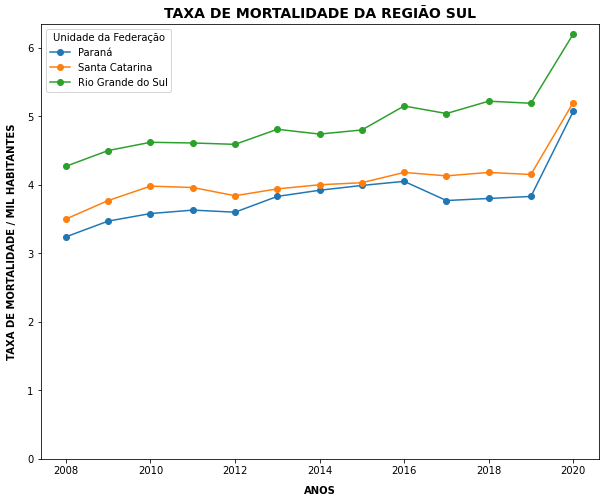

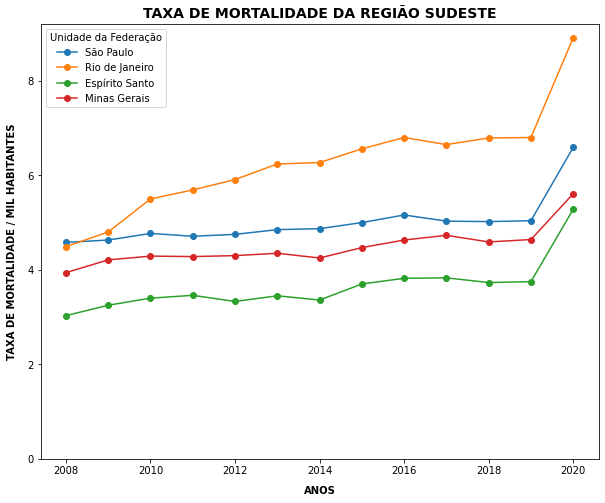

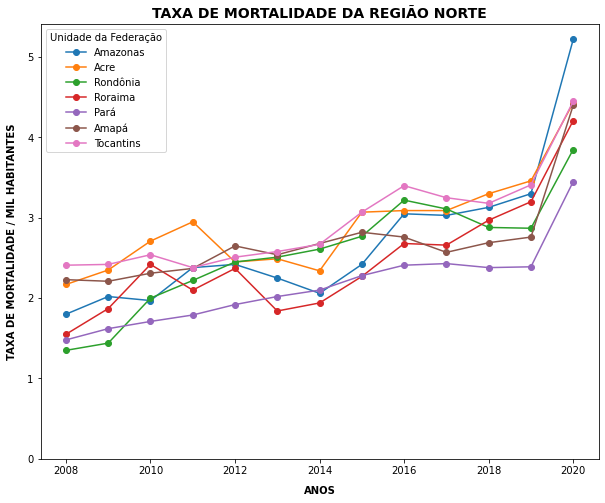

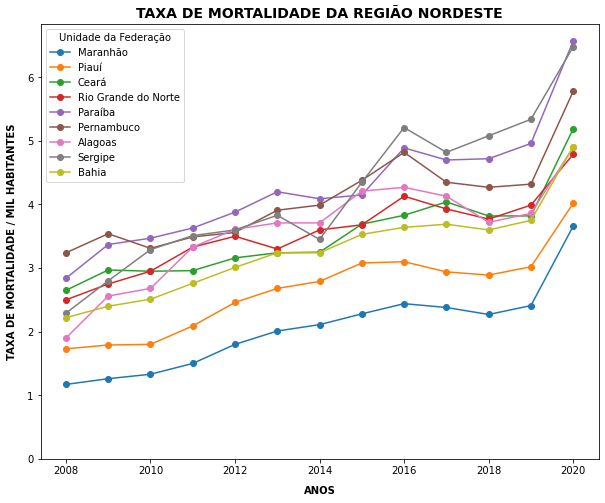

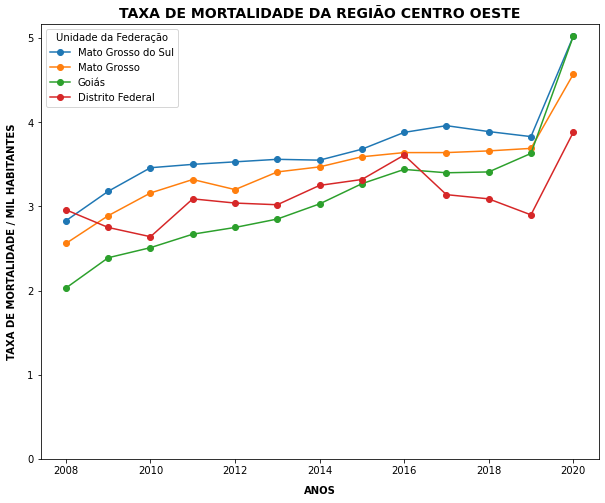

In [12]:
# Gerando gráficos das regiões brasileiras com as informações sobre a taxa da mortalidade
ax_reg_sul = dados_mortal.loc[['Paraná', 'Santa Catarina', 'Rio Grande do Sul']].T[:-2].plot(figsize=(10,8),
                                                                                             marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('TAXA DE MORTALIDADE DA REGIÃO SUL', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)

ax_reg_sud = dados_mortal.loc[['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']].T[:-2].plot(figsize=(10,8),
                                                                                                             marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('TAXA DE MORTALIDADE DA REGIÃO SUDESTE', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)

ax_reg_norte = dados_mortal.loc[['Amazonas', 'Acre', 'Rondônia', 'Roraima', 'Pará', 'Amapá', 'Tocantins']].T[:-2].plot(figsize=(10,8),
                                                                                                             marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('TAXA DE MORTALIDADE DA REGIÃO NORTE', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)

ax_reg_nord = dados_mortal.loc[['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe',
                                'Bahia']].T[:-2].plot(figsize=(10,8),marker='o')                                                                                                             
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('TAXA DE MORTALIDADE DA REGIÃO NORDESTE', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)

ax_reg_cent = dados_mortal.loc[['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']].T[:-2].plot(figsize=(10,8),marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('TAXA DE MORTALIDADE DA REGIÃO CENTRO OESTE', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)

plt.show()

### Analisando os gráficos é possível verificar, no período analisado, que a **taxa de mortalidade** vem aumentando ao longo dos anos para, praticamente, todos os estados.

### Em todos os estados há um aumento significativo no ano de 2020, que pode ser devido a pandemia de **COVID 19**.

## UNIDADES DA FEDERAÇÃO COM AS **MAIORES TAXAS DE MORTALIDADE**

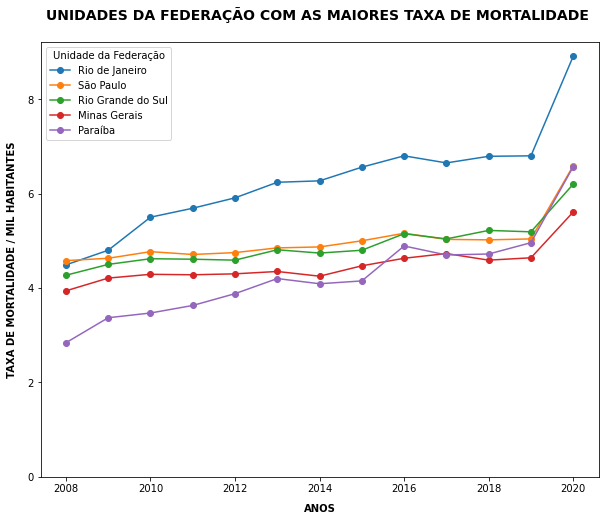

In [13]:
# ordenando as unidades da federação conforme as taxas de mortalidade
ordenado_total_mortal = dados_mortal.sort_values(by='Total', ascending=False)

# plotando o gráfico com as 5 unidades da federação com a taxa de mortalidade mais alta
ordenado_total_mortal.head(5).T[:-2].plot(figsize=(10, 8), marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('UNIDADES DA FEDERAÇÃO COM AS MAIORES TAXA DE MORTALIDADE \n', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)
plt.show()

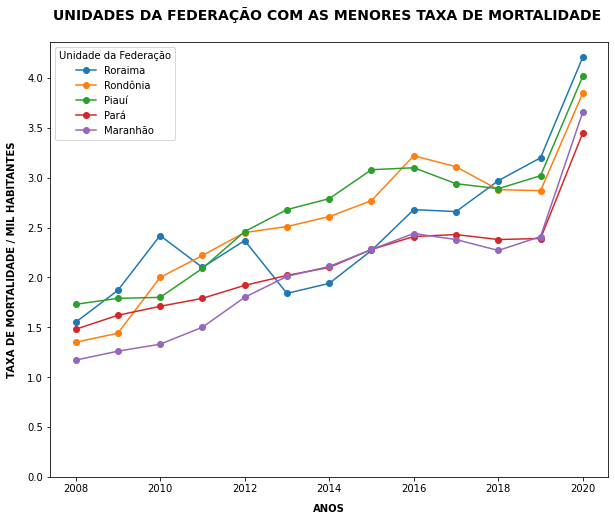

In [89]:
# plotando o gráfico com as 5 unidades da federação com a taxa de mortalidade mais baixa
ordenado_total_mortal.tail(5).T[:-2].plot(figsize=(10, 8), marker='o')
plt.xlabel('ANOS', color = 'black', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylabel('TAXA DE MORTALIDADE / MIL HABITANTES', labelpad=10, fontsize=10, fontweight = 'bold')
plt.title('UNIDADES DA FEDERAÇÃO COM AS MENORES TAXA DE MORTALIDADE \n', fontweight='bold', fontsize=14)
plt.ylim(bottom=0)
plt.show()

### Nos dados é possível verificar a **região sudeste** com três estados entre os 5 com as **maiores taxas de mortalidade**, um estado da **região sul** e um da **região nordeste**.

### O estado do **Rio de Janeiro** apresenta um **aumento significativo** da **taxa de mortalidade** ao longo dos anos. A diferença para os demais estados é notável.

### Os estados foram fortemente afetados pela pandemia de **Covid-19**, isso pode explicar suas **taxas de mortalidade aumentadas significativamente no ano de 2020**.

## **DADOS POPULACIONAIS** NAS REGIÕES DO BRASIL

In [14]:
# verificando o crescimento populacional nas regiões brasileiras
dados_pop_regiao.set_index('Unidade da Federação', inplace=True)

# utilizando os dados a partir de 2008 para ser condizente com os outros datasets
colunas_pop_regiao = dados_pop_regiao.columns[7:]
dados_pop_regiao = dados_pop_regiao[colunas_pop_regiao]

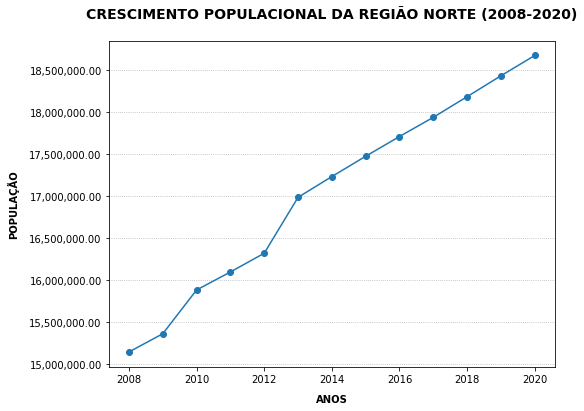

In [15]:
# gráfico para a região Norte
ax_pop_nort = dados_pop_regiao.loc['Região Norte'].plot(marker='o', figsize=(8, 6))
ax_pop_nort.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_pop_nort.grid(which='major', axis='y', linestyle='dotted')
plt.title('CRESCIMENTO POPULACIONAL DA REGIÃO NORTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('POPULAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.show()

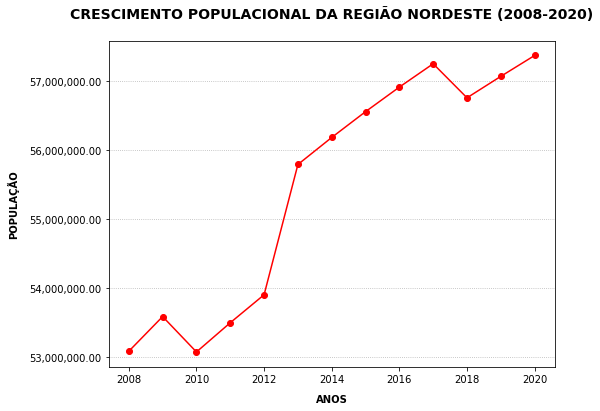

In [16]:
# gráfico para a região Nordeste
ax_pop_nord = dados_pop_regiao.loc['Região Nordeste'].plot(marker='o', figsize=(8, 6), color='r')
ax_pop_nord.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_pop_nord.grid(which='major', axis='y', linestyle='dotted')
plt.title('CRESCIMENTO POPULACIONAL DA REGIÃO NORDESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('POPULAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.show()

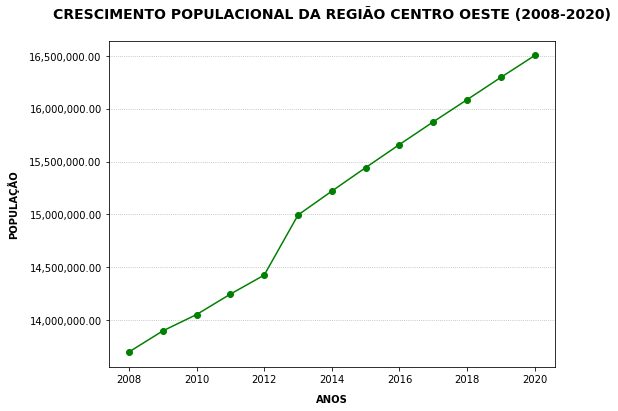

In [17]:
# gráfico para região centro oeste
ax_pop_nord = dados_pop_regiao.loc['Região Centro-Oeste'].plot(marker='o', figsize=(8, 6), color='g')
ax_pop_nord.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_pop_nord.grid(which='major', axis='y', linestyle='dotted')
plt.title('CRESCIMENTO POPULACIONAL DA REGIÃO CENTRO OESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('POPULAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.show()

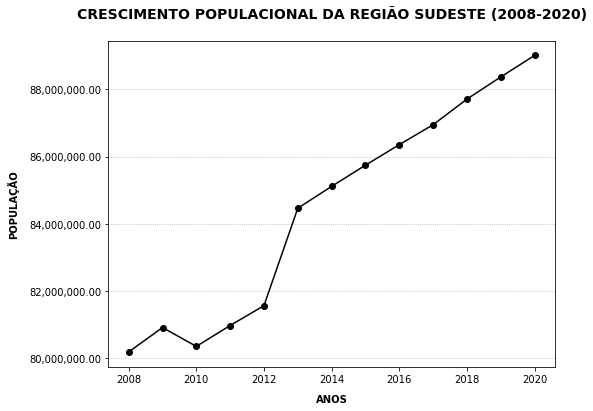

In [18]:
# gráfico para região sudeste
ax_pop_nord = dados_pop_regiao.loc['Região Sudeste'].plot(marker='o', figsize=(8, 6), color='k')
ax_pop_nord.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_pop_nord.grid(which='major', axis='y', linestyle='dotted')
plt.title('CRESCIMENTO POPULACIONAL DA REGIÃO SUDESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('POPULAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.show()

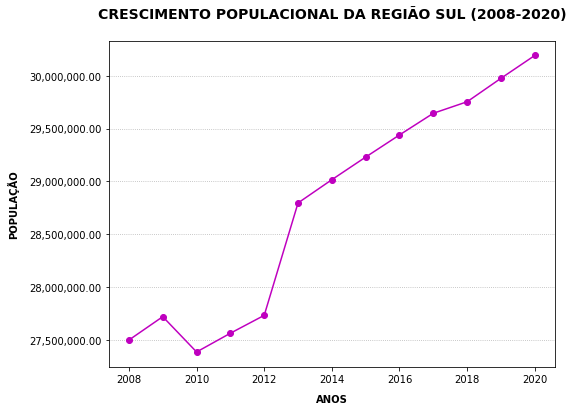

In [19]:
# gráfico para  região sul
ax_pop_nord = dados_pop_regiao.loc['Região Sul'].plot(marker='o', figsize=(8, 6), color='m')
ax_pop_nord.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_pop_nord.grid(which='major', axis='y', linestyle='dotted')
plt.title('CRESCIMENTO POPULACIONAL DA REGIÃO SUL (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('POPULAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.show()

### Verifica-se um **crescimento populacional** em todos as regiões do **Brasil**.

### As **regiões norte** e **centro oeste** apresentam um **crescimento constante** através dos anos.

### As **regiões nordeste**, **sudeste** e **sul** também apresentam um crescimento populacional mas com **queda entre 2009** e **2010**. A **região nordeste** também apresenta uma **queda** na população entre **2017** e **2018**.

### **Todas** as regiões apresentam um **aumento significativo** na população entre **2012** e **2013**.

# DADOS DE **GASTOS COM SAÚDE PÚBLICA**

In [20]:
# retirando a coluna total e 2021 do dataset
dados_gastos = dados_gastos.drop(['Total', '2021'], axis=1)

# adicionando uma nova coluna total e somando os valores
dados_gastos['Total'] = dados_gastos.sum(axis=1)
dados_gastos.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Unidade da Federação,,,,,,,,,,,,,,
Acre,22365143.69,27339128.19,28773343.06,33510058.61,32929373.49,33605893.87,36039320.36,37262018.93,40487149.58,37245525.42,34432565.81,34709598.96,40018213.54,438717333.51
Alagoas,109226734.11,132886107.72,142837203.93,152529100.85,148620456.33,169991894.11,163585154.41,177761701.65,177582559.02,191840311.19,201009115.58,204786689.26,205569621.04,2178226649.20
Amapá,16355880.94,21871680.65,20736476.68,22010050.32,23197926.19,24101437.86,23354262.75,22053145.67,21916972.06,22366616.97,25843955.47,29370406.98,27872333.42,301051145.96
Amazonas,95655211.98,105997335.28,114040833.27,121643071.13,124449598.86,129056584.80,121900696.54,151278739.06,147812237.69,160820207.41,175744827.43,189256198.89,210212793.77,1847868336.11
Bahia,476204799.63,591109057.21,616650968.67,646488530.95,673849510.16,712401313.44,757704806.91,785597108.46,810137241.08,821240562.79,845519121.44,879675393.50,914262558.89,9530840973.13


In [21]:
# definindo as variáveis para as regiões do Brasil
gasto_nort = dados_gastos.loc[['Amazonas', 'Acre', 'Rondônia', 'Roraima', 'Pará', 'Amapá', 'Tocantins']]
gasto_nord = dados_gastos.loc[['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']]
gasto_cent = dados_gastos.loc[['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']]
gasto_sud = dados_gastos.loc[['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']]
gasto_sul = dados_gastos.loc[['Paraná', 'Santa Catarina', 'Rio Grande do Sul']]

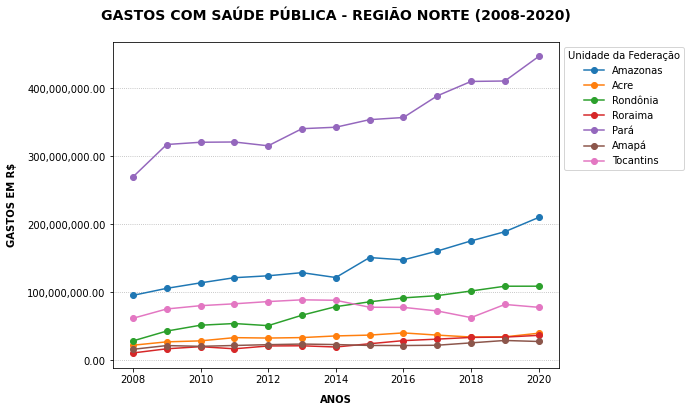

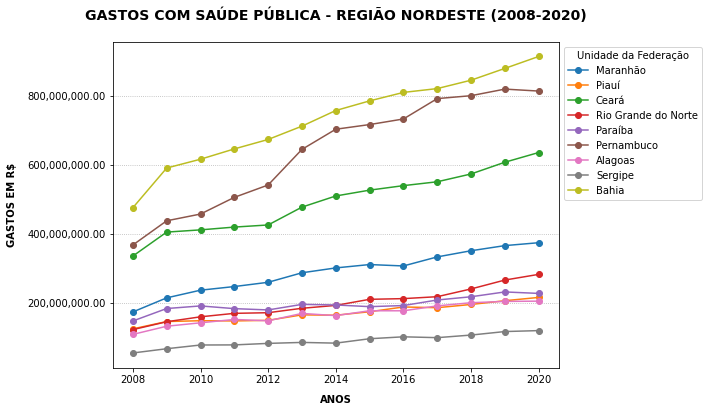

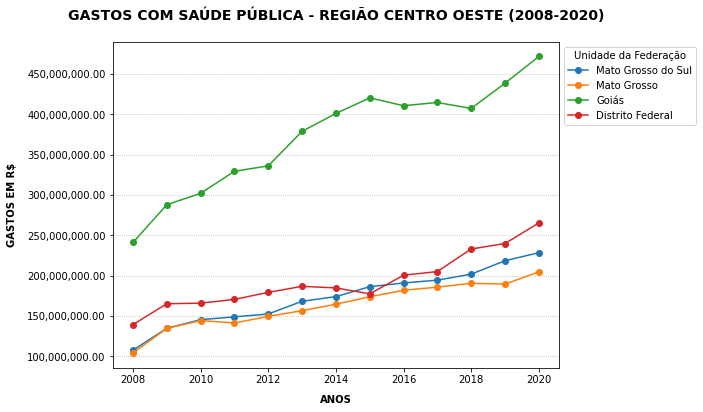

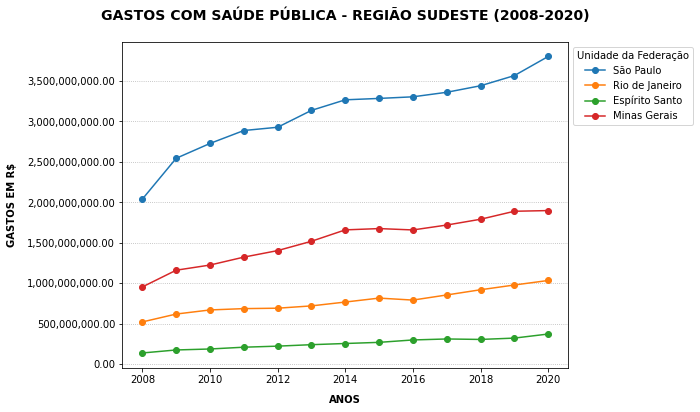

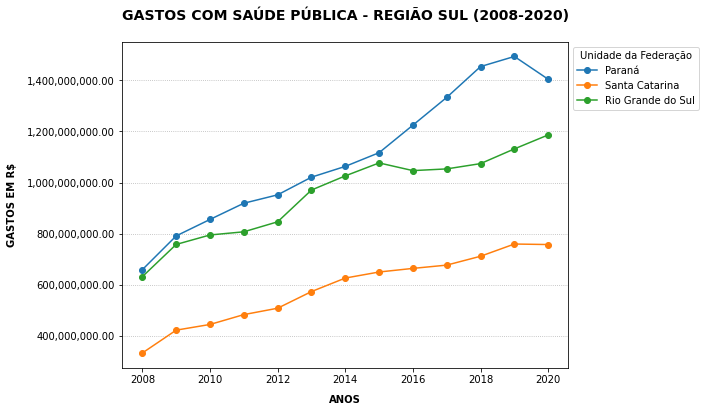

In [22]:
# gráfico para região norte
ax_gast_nort = gasto_nort.T[:-1].plot(figsize=(8, 6), marker='o')
ax_gast_nort.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gast_nort.grid(which='major', axis='y', linestyle='dotted')
plt.title('GASTOS COM SAÚDE PÚBLICA - REGIÃO NORTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1), title='Unidade da Federação')

# gráfico para região nordeste
ax_gast_nord = gasto_nord.T[:-1].plot(figsize=(8, 6), marker='o')
ax_gast_nord.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gast_nord.grid(which='major', axis='y', linestyle='dotted')
plt.title('GASTOS COM SAÚDE PÚBLICA - REGIÃO NORDESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1), title='Unidade da Federação')

# gráfico para região centro oeste
ax_gast_cent = gasto_cent.T[:-1].plot(figsize=(8, 6), marker='o')
ax_gast_cent.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gast_cent.grid(which='major', axis='y', linestyle='dotted')
plt.title('GASTOS COM SAÚDE PÚBLICA - REGIÃO CENTRO OESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1), title='Unidade da Federação')

# gráfico para região sudeste
ax_gast_sud = gasto_sud.T[:-1].plot(figsize=(8, 6), marker='o')
ax_gast_sud.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gast_sud.grid(which='major', axis='y', linestyle='dotted')
plt.title('GASTOS COM SAÚDE PÚBLICA - REGIÃO SUDESTE (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1), title='Unidade da Federação')

# gráfico para região sul
ax_gast_sul = gasto_sul.T[:-1].plot(figsize=(8, 6), marker='o')
ax_gast_sul.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gast_sul.grid(which='major', axis='y', linestyle='dotted')
plt.title('GASTOS COM SAÚDE PÚBLICA - REGIÃO SUL (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1,1), title='Unidade da Federação')

plt.show()

### Pode-se verificar um **crescimento** nos **gastos com saúde pública** através dos anos para todas as unidades da federação.

### É possível notar crescimentos abruptos entre alguns anos, o que pode ser explicado por alguma crise sanitária que demandou mais gastos no período.

### É possível verificar, em algumas unidades da federação, um **grande aumento** nos gastos para o ano de **2020**. O que pode ser a causa do aumento de gastos é a pandemia de **Covid-19**.

#### No site do **DATASUS** é informado que os dados referentes aos últimos seis meses estão sujeitos a atualização, isso pode explicar o gasto não ter aumentado para o ano de 2020 em algumas unidades da federação.

## Verificando quais são as unidades da federação com os **maiores gastos em valores absolutos**

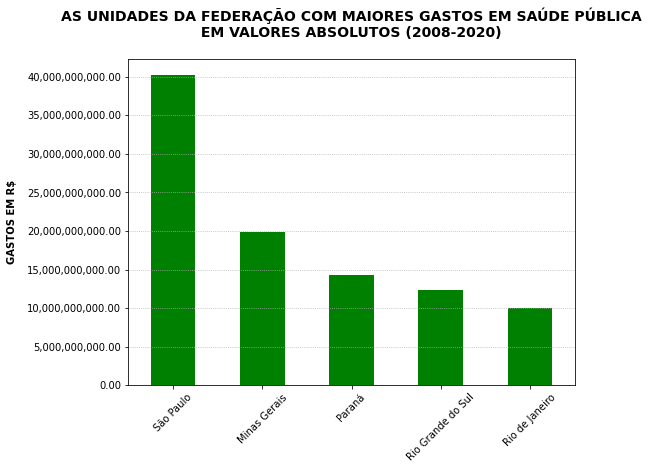

In [23]:
# ordenando os valores pela coluna Total
orden_dados_gastos = dados_gastos.sort_values(by='Total', ascending=False)

# gerando gráfico com as 5 unidades da federação com maiores gastos absolutos em saúde pública
ax_gasto = orden_dados_gastos['Total'].head(5).T.plot(figsize=(8, 6), kind='bar', color = 'green')
ax_gasto.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gasto.grid(which='major', axis='y', linestyle='dotted')
plt.title('AS UNIDADES DA FEDERAÇÃO COM MAIORES GASTOS ABSOLUTOS EM SAÚDE PÚBLICA\n (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Percebe-se que as unidades da federação com os **maiores gastos em saúde pública**, em valores absolutos, estão localizados nas **regiões sudeste** e **sul**.

## Verificando quais são as unidades da federação com os **menores gastos** em valores absolutos

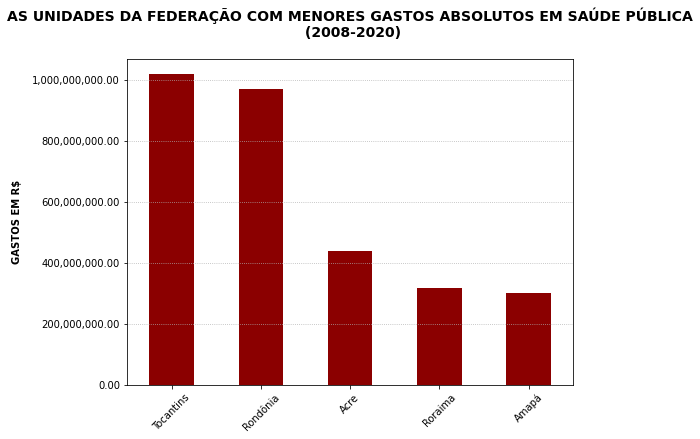

In [90]:
# gerando gráfico com as 5 unidades da federação com menores gastos absolutos em saúde pública
ax_gasto = orden_dados_gastos['Total'].tail(5).T.plot(figsize=(8, 6), kind='bar', color = 'darkred')
ax_gasto.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_gasto.grid(which='major', axis='y', linestyle='dotted')
plt.title('AS UNIDADES DA FEDERAÇÃO COM MENORES GASTOS ABSOLUTOS EM SAÚDE PÚBLICA\n (2008-2020)\n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

### Nota-se que as unidades da federação com os **menores gastos em saúde pública**, em valores absolutos, estão localizadas nas **regiões Norte** e **Nordeste**.

# **GASTOS COM SAÚDE PÚBLICA POR HABITANTE**

In [24]:
# removendo a coluna total do dataset
dados_gastos.drop('Total', axis=1, inplace=True)

# selecionando os dados populacionais a partir de 2008
dados_pop_col = dados_pop.columns[7:]
dados_pop = dados_pop[dados_pop_col]

# calculando gastos por pessoa para as unidades da federação
rel_pop_gast = dados_gastos.div(dados_pop.values)
rel_pop_gast.columns = dados_gastos.columns

# calculando a média geral dos gastos por pessoa para cada unidade da federação
rel_pop_gast['Média'] = rel_pop_gast.mean(axis=1)
rel_pop_gast = rel_pop_gast.sort_values(by='Média', ascending=False)


## VERIFICANDO QUAIS SÃO AS UNIDADES DA FEDERAÇÃO COM A **MAIOR** E **MENOR MÉDIA** DE GASTOS POR HABITANTE

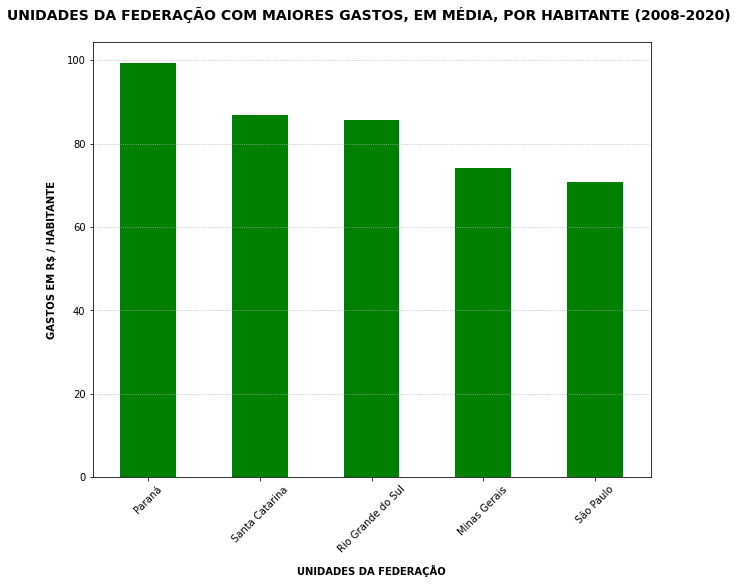

In [82]:
# gerando o gráfico para verificar os que mais gastaram, em média, para cada habitante
ax_sp = rel_pop_gast['Média'].head(5).plot(figsize = (10, 8), color='green', kind='bar')
#ax_sp.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('UNIDADES DA FEDERAÇÃO COM MAIORES GASTOS, EM MÉDIA, POR HABITANTE (2008-2020) \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('UNIDADES DA FEDERAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='dotted')
plt.show()

### Verifica-se um domínio das **regiões sul e sudeste** tanto nos gastos totais absolutos quanto nos gastos por habitante.

### O estado de **Santa Catarina**, que não aparecia entre os 5 estados que mais gastaram no período, aparece em **segundo** entre os estados que **mais gastam por habitante**.

### **São Paulo**, o estado com os maiores gastos em valores absolutos, é o **quinto** quando verificamos os **gastos com cada habitante**.

### O estado do **Paraná**, terceiro entre os maiores gastos absolutos, é o **primeiro** com o **maior gasto** com saúde pública para cada **habitante**.

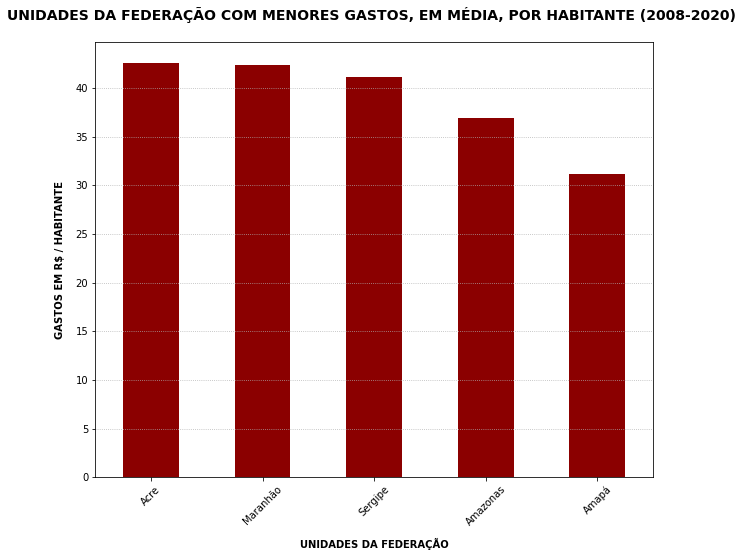

In [83]:
# gerando o gráfico para verificar os que mais gastaram, em média, para cada habitante
ax_menos = rel_pop_gast['Média'].tail(5).plot(figsize = (10, 8), color='darkred', kind='bar')
#ax_sp.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('UNIDADES DA FEDERAÇÃO COM MENORES GASTOS, EM MÉDIA, POR HABITANTE (2008-2020) \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('UNIDADES DA FEDERAÇÃO', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='dotted')
plt.show()

### Assim como na análise das unidades da federação com menores gastos absolutos em saúde pública, nota-se também as **regiões norte** e **nordeste** entre os **menores gastos por habitantes**.

### O estado do **Amapá** é o que possui os **menores gastos absolutos** e também por **habitante**. Em comparação com o estado com os maiores gastos, Paraná, o estado do Amapá tem gastos por habitante três vezes menores.

# ANÁLISE DE **RELAÇÃO** ENTRE OS **GASTOS EM SAÚDE PÚBLICA POR HABITANTE** E A **TAXA DE MORTALIDADE**

## Utilizando como base as **5 unidades da federação** com os **maiores gastos por habitante**, que verificamos anteriormente.

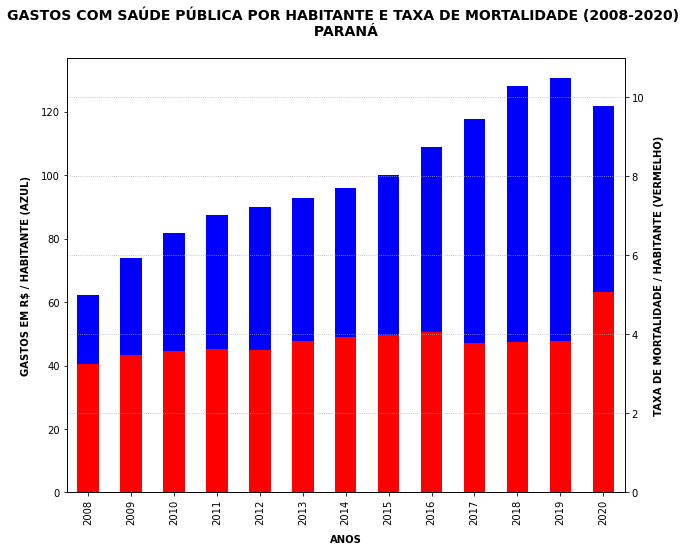

In [71]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para paraná
ax_sc = rel_pop_gast.loc['Paraná'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'b')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n PARANÁ \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Paraná'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='r', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

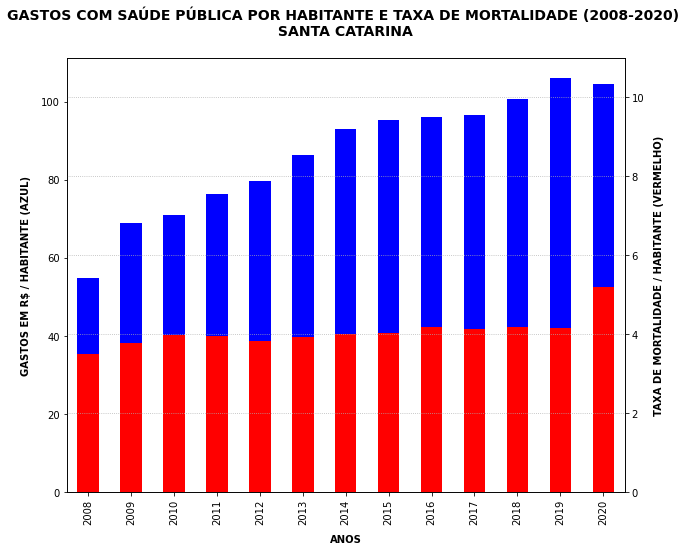

In [69]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para santa catarina
ax_sc = rel_pop_gast.loc['Santa Catarina'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'b')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n SANTA CATARINA \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Santa Catarina'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='r', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

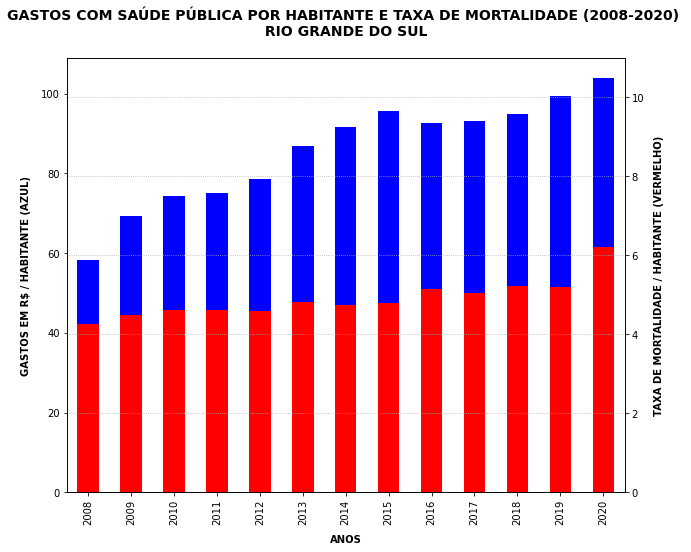

In [72]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para rio grande do sul
ax_sc = rel_pop_gast.loc['Rio Grande do Sul'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'b')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n RIO GRANDE DO SUL \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Rio Grande do Sul'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='r', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

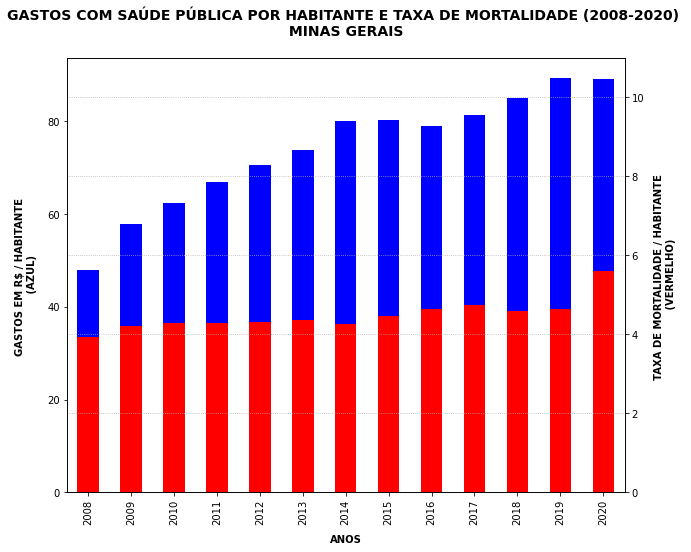

In [73]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para minas gerais
ax_sc = rel_pop_gast.loc['Minas Gerais'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'b')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n MINAS GERAIS \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Minas Gerais'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='r', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

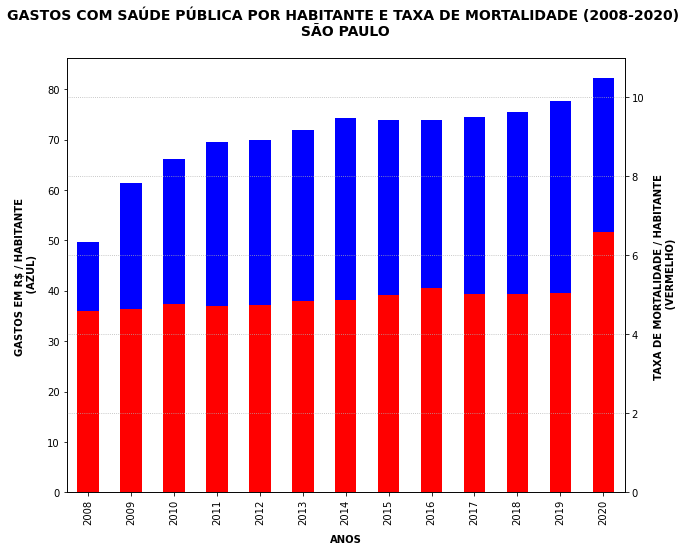

In [75]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para são paulo
ax_sc = rel_pop_gast.loc['São Paulo'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'b')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n SÃO PAULO \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['São Paulo'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='r', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

## Utilizando como base as **5 unidades da federação** com os **menores gastos por habitante**, que verificamos anteriormente.

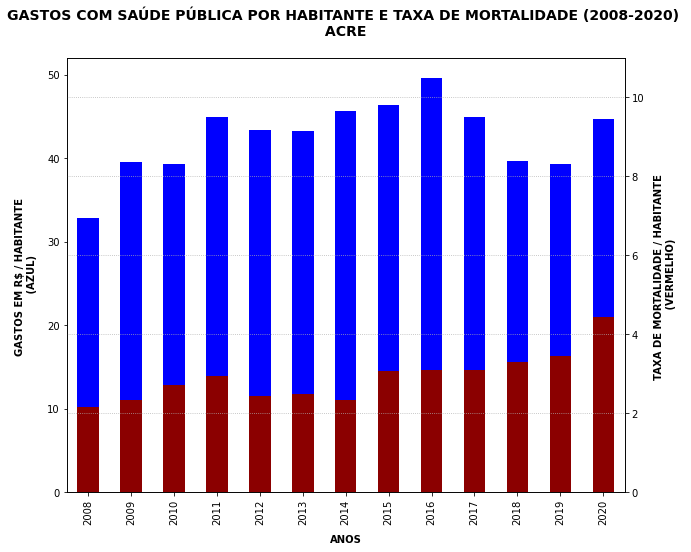

In [84]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para acre
ax_sc = rel_pop_gast.loc['Acre'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'blue')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n ACRE \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Acre'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='darkred', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

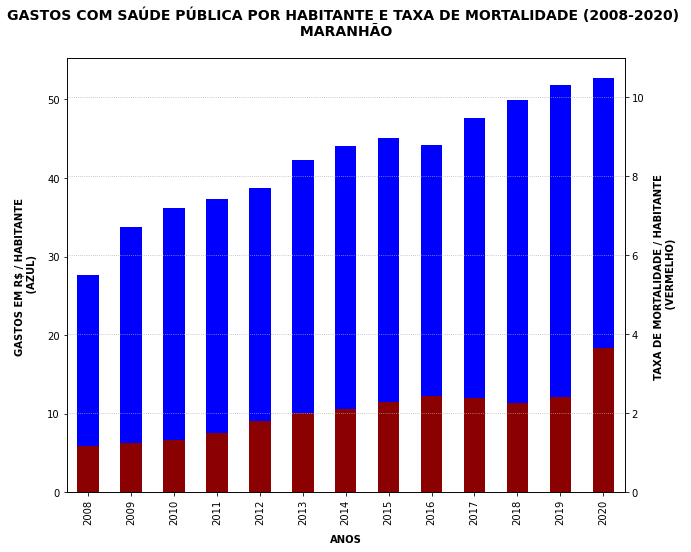

In [85]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para maranhão
ax_sc = rel_pop_gast.loc['Maranhão'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'blue')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n MARANHÃO \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Maranhão'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='darkred', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

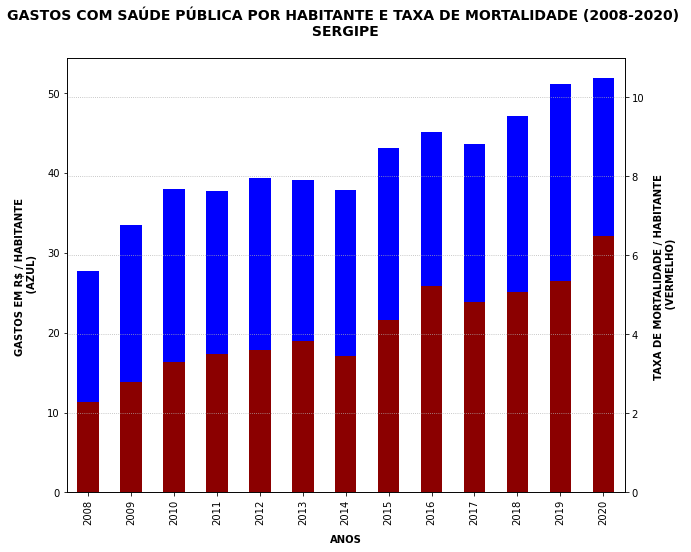

In [86]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para sergipe
ax_sc = rel_pop_gast.loc['Sergipe'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'blue')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n SERGIPE \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Sergipe'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='darkred', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

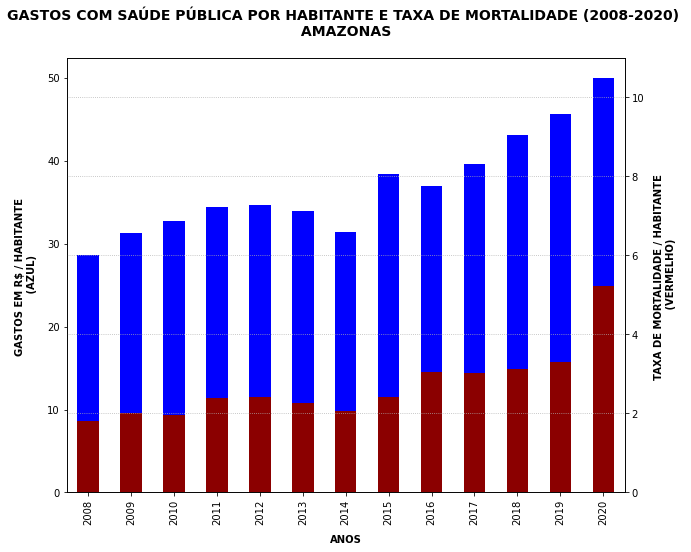

In [87]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para amazonas
ax_sc = rel_pop_gast.loc['Amazonas'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'blue')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n AMAZONAS \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Amazonas'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='darkred', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

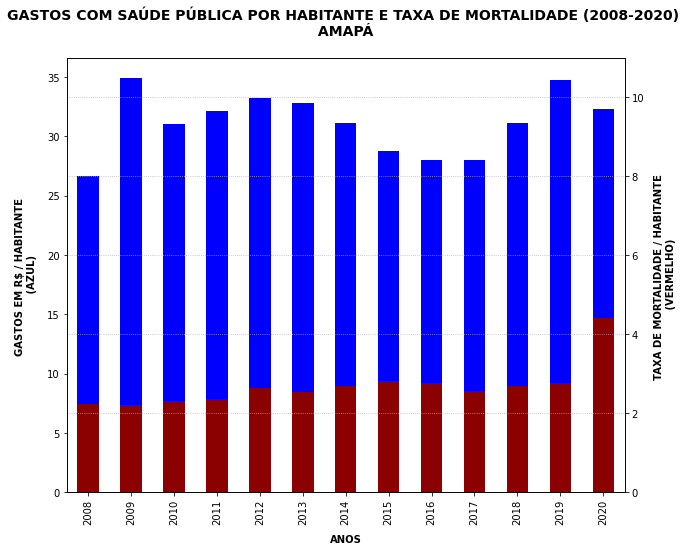

In [88]:
#verificando a taxa de mortalidade em relação aos gastos com saúde pública para amapá
ax_sc = rel_pop_gast.loc['Amapá'].T[:-1].plot(figsize=(10,8), kind='bar', color = 'blue')
plt.title('GASTOS COM SAÚDE PÚBLICA POR HABITANTE E TAXA DE MORTALIDADE (2008-2020) \n AMAPÁ \n', fontsize=14, fontweight='bold')
plt.ylabel('GASTOS EM R$ / HABITANTE \n (AZUL)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.xlabel('ANOS', labelpad=10, fontsize=10, fontweight = 'bold')

# eixo y secundário
dados_mortal.loc['Amapá'].T[:-2].plot(ax=ax_sc, secondary_y=True, color='darkred', kind='bar')
plt.ylabel('TAXA DE MORTALIDADE / HABITANTE \n (VERMELHO)', labelpad=10, fontsize=10, fontweight = 'bold')
plt.ylim(0,11)
plt.grid(which='major', axis='y', linestyle='dotted')

plt.show()

# **CONCLUSÃO**

### Verificando os gastos em saúde pública por habitante, o aumento nos gastos **não** diminuiu a taxa de mortalidade nos estados. A taxa de mortalidade vem aumentando ao longo dos anos, assim como os gastos.

### O aumento nos gastos em saúde pública por habitante entre os estados com os menores gastos não é tão uniforme quando comparado com os estados com os maiores gastos. Em alguns estados é perceptível anos em que os gastos foram até reduzidos, sem efeito significativo na taxa de mortalidade.

### O estado do **Amapá** possui o **menor gasto em saúde pública por habitante** e também uma **taxa de mortalidade menor** quando comparado com os estados com os maiores gastos.

### Em todas as unidades da federação analisadas vemos um **aumento significativo** nos **gastos** com saúde pública e na **taxa de mortalidade** para o ano de **2020**. Isso, provavelmente, está relacionado com a pandemia de **Covid-19**. Uma análise sobre os dados da pandemia é necessária para afirmar o impacto real.

### De forma geral, e com uma análise breve sobre os dados, a taxa de mortalidade se mantém estável ao longos do anos, exceto 2020, mesmo com o aumento nos gastos com saúde pública.

### **Com base nos dados analisados não é possível afirmar que há uma relação entre a taxa de mortalidade e os gastos com saúde pública. Seria necessário verificar a razão dos gastos estarem aumentando (inflação, tratamentos e equipamentos mais modernos e caros, etc...) e como isso não afeta a taxa de mortalidade.**

